# クラスタリング
 クラスタリングとは、データの傾向を機会的に分類すること。  
 クラスタリングには、大きく階層型クラスタリングと、非階層型クラスタリングがある>。  

# k平均法
k平均法とは、各データ間の距離でグルーピングしていく手法。  
1. k個の中心をランダムに定める  
1. 各データを最も近い中心に紐づける  
1. 各クラスタの重心を計算する  
1. 重心を新たな中心とし、2を実行  
1. 重心が移動しなくなるまで3以降を繰り返す  

In [12]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

# アイリスデータの読み込み
iris = load_iris()

# サンプル数、カラム数を確認
print(iris.data.shape)
# ターゲットの確認
print(iris.target_names)
# データフレームに格納
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
# 基本量の確認
display(df_iris.describe())

(150, 4)
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


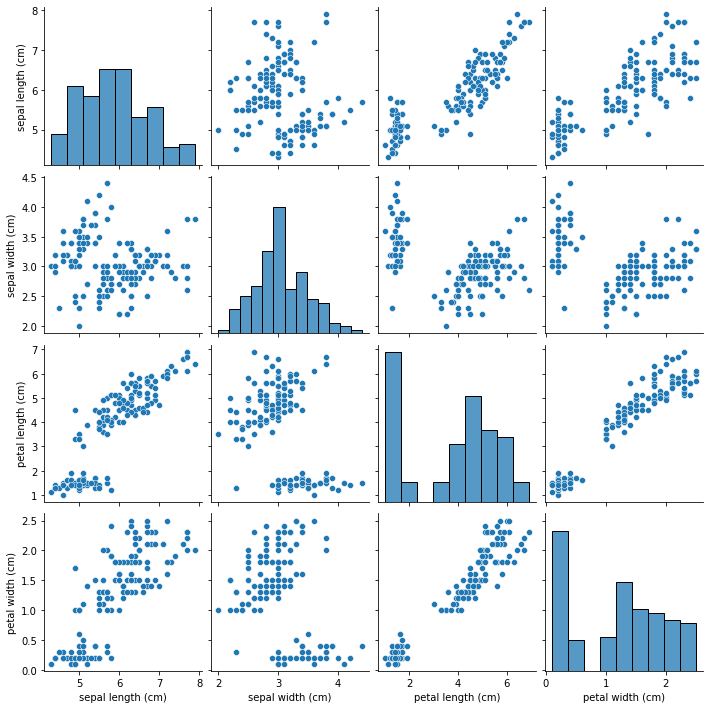

In [13]:
import seaborn as sns
df_temp = df_iris.copy()
# 変数の散布図を表示
sns.pairplot(df_temp)

ぱっと見、重さと長さが比例していることがわかる。  
他にも、いくつかのクラスタが垣間見える。

In [17]:
from sklearn.cluster import KMeans

# クラスタ数3, 乱数シードの固定を設定
model = KMeans(n_clusters=3, random_state=0, init="random")

# データセットのコピー
cls_data = df_iris.copy()

# モデルの構築
model.fit(cls_data)

# 予測結果の取得
cluster = model.predict(cls_data)
display(cluster)
# 3つのクラスタに分類されている

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

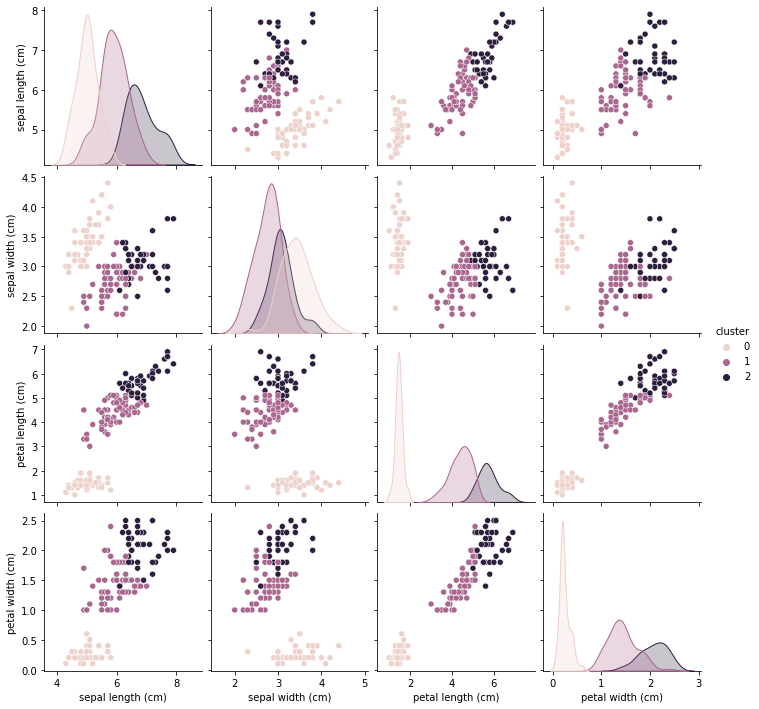

In [18]:
# クラスタ番号をデータセットに付与する
cls_data["cluster"] = cluster

# 散布図の作成と、クラスタ毎に色を付ける
sns.pairplot(cls_data, hue="cluster")

In [24]:
# 作成したモデルの中心値を取得する
cluster_center = pd.DataFrame(model.cluster_centers_)

# カラム名を取得し、代入する
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053
